#Task 1

In [1]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load dataset
titanic = pd.read_csv('/content/drive/MyDrive/pandas/Titanic-Dataset.csv')

# Check DataFrame info
print(titanic.info())

# Problem 1: Sorting
# 1. Fare column
fare = titanic[['Fare']]
print(fare.head())

# 2. Pclass and Age columns
class_age = titanic[['Pclass', 'Age']]
print(class_age.head())

# 3. Survived and Sex columns
survived_gender = titanic[['Survived', 'Sex']]
print(survived_gender.head())

# Problem 2: Subsetting
# Subsetting Rows
fare_gt_100 = titanic[titanic['Fare'] > 100]
print(fare_gt_100)

first_class = titanic[titanic['Pclass'] == 1]
print(first_class)

female_under_18 = titanic[(titanic['Age'] < 18) & (titanic['Sex'] == 'female')]
print(female_under_18)

# Subsetting Rows by Categorical variables
embarked_c_or_s = titanic[titanic['Embarked'].isin(['C', 'S'])]
print(embarked_c_or_s)

first_second_class = titanic[titanic['Pclass'].isin([1, 2])]
print(first_second_class)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
      Fare
0   7.2500
1  71.2833
2   7.9250
3  53.1000
4   8.0500
   Pclass   Age
0       3  22.0
1       1  38.0
2       3  26.0
3       1  35.0
4       3  35.0
   Survived     Sex
0         0    male
1         1  female
2         1  fema

#Task 2

#Question 1

In [4]:
# Fill missing values in Age with the median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Add fare_per_year column
titanic['fare_per_year'] = titanic['Fare'] / titanic['Age']

# Subset rows where fare_per_year > 5
high_fare_age = titanic[titanic['fare_per_year'] > 5]

# Sort by descending fare_per_year
high_fare_age_srt = high_fare_age.sort_values('fare_per_year', ascending=False)

# Select Name and fare_per_year columns
result = high_fare_age_srt[['Name', 'fare_per_year']]
print(result)


                                               Name  fare_per_year
305                  Allison, Master. Hudson Trevor     164.728261
297                    Allison, Miss. Helen Loraine      75.775000
386                 Goodwin, Master. Sidney Leonard      46.900000
164                    Panula, Master. Eino Viljami      39.687500
183                       Becker, Master. Richard F      39.000000
..                                              ...            ...
348          Coutts, Master. William Loch "William"       5.300000
31   Spencer, Mrs. William Augustus (Marie Eugenie)       5.232886
205                      Strom, Miss. Telma Matilda       5.231250
813              Andersson, Miss. Ebba Iris Alfrida       5.212500
480                  Goodwin, Master. Harold Victor       5.211111

[71 rows x 2 columns]


<ipython-input-4-b79c66821583>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


#Question 2

In [5]:
# Add fare_per_class column
titanic['fare_per_class'] = titanic['Fare'] / titanic['Pclass']

# Subset for adult males
adult_males = titanic[(titanic['Age'] >= 18) & (titanic['Sex'] == 'male')]

# Sort by descending fare_per_class
adult_males_srt = adult_males.sort_values('fare_per_class', ascending=False)

# Select Name, Age, and fare_per_class columns
result = adult_males_srt[['Name', 'Age', 'fare_per_class']]
print(result)


                                   Name   Age  fare_per_class
737              Lesurer, Mr. Gustave J  35.0        512.3292
679  Cardeza, Mr. Thomas Drake Martinez  36.0        512.3292
438                   Fortune, Mr. Mark  64.0        263.0000
27       Fortune, Mr. Charles Alexander  19.0        263.0000
118            Baxter, Mr. Quigg Edmond  24.0        247.5208
..                                  ...   ...             ...
806              Andrews, Mr. Thomas Jr  39.0          0.0000
481    Frost, Mr. Anthony Wood "Archie"  28.0          0.0000
413      Cunningham, Mr. Alfred Fleming  28.0          0.0000
466               Campbell, Mr. William  28.0          0.0000
271        Tornquist, Mr. William Henry  25.0          0.0000

[519 rows x 3 columns]


#Task 3

#Question 1

In [6]:
# Total fare
total_fare = titanic['Fare'].sum()

# Fare by class
fare_by_class = titanic.groupby('Pclass')['Fare'].sum()

# Proportion of fare revenue by class
fare_percentage = (fare_by_class / total_fare) * 100
print(fare_percentage)


Pclass
1    63.349288
2    13.249629
3    23.401084
Name: Fare, dtype: float64


#Question 2

In [7]:
# Create age_group column
def age_group(age):
    if age < 18:
        return 'child'
    elif age >= 65:
        return 'senior'
    else:
        return 'adult'

titanic['age_group'] = titanic['Age'].apply(age_group)

# Total passengers
total_passengers = len(titanic)

# Passengers by age group
age_group_count = titanic['age_group'].value_counts()

# Proportion of passengers by age group
age_group_percentage = (age_group_count / total_passengers) * 100
print(age_group_percentage)


age_group
adult     86.083053
child     12.682379
senior     1.234568
Name: count, dtype: float64


#Task 4


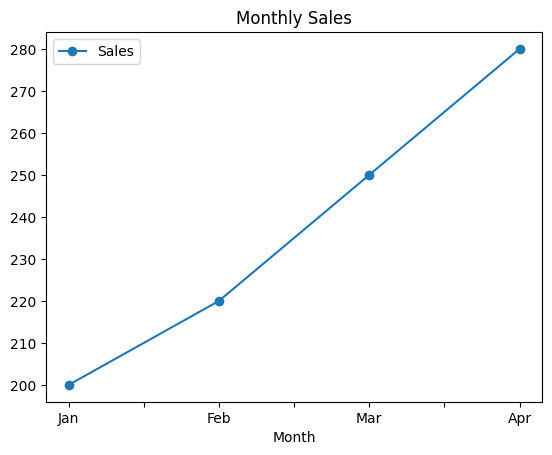

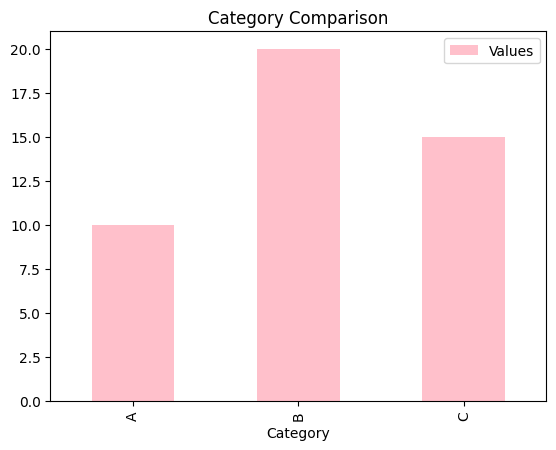

In [9]:
import matplotlib.pyplot as plt

# Line plot: Monthly sales
data = {'Month': ['Jan', 'Feb', 'Mar', 'Apr'], 'Sales': [200, 220, 250, 280]}
df = pd.DataFrame(data)
df.plot(x='Month', y='Sales', kind='line', marker='o', title='Monthly Sales')
plt.show()

# Bar chart: Category comparison
data = {'Category': ['A', 'B', 'C'], 'Values': [10, 20, 15]}
df = pd.DataFrame(data)
df.plot(x='Category', y='Values', kind='bar', color='pink', title='Category Comparison')
plt.show()
